In [1]:
!nvidia-smi

/usr/bin/zsh: /mnt/drive1/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
Sat Aug  6 16:25:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P3    N/A /  N/A |    430MiB /  4096MiB |     17%      Default |
|                               |                      |                  N/A |
+-------------------------------+--------------------

In [2]:
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/

/usr/bin/zsh: /mnt/drive1/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)


In [3]:
!python3 -c 'import tensorflow as tf; print("Number of GPU : ",tf.config.list_physical_devices("GPU")) '

/usr/bin/zsh: /mnt/drive1/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
Number of GPU :  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
!python3 -c 'import torch as tc; print("GPU available : ", tc.cuda.is_available())'

/usr/bin/zsh: /mnt/drive1/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
GPU available :  False


In [5]:
!pwd && cd /mnt/drive1/ 

/usr/bin/zsh: /mnt/drive1/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
/mnt/drive1/Joint-Sentence-Classification-by-Neural-Networks/Reference-sec


In [6]:
! cd /mnt/drive1/Joint-Sentence-Classification-by-Neural-Networks

/usr/bin/zsh: /mnt/drive1/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)


NLP problems are classified as sequence problems in the real worlds because the AI in
uses word embeddings or vectorised word to train on real world data and then classify textual matters

There are various types of sequence problems

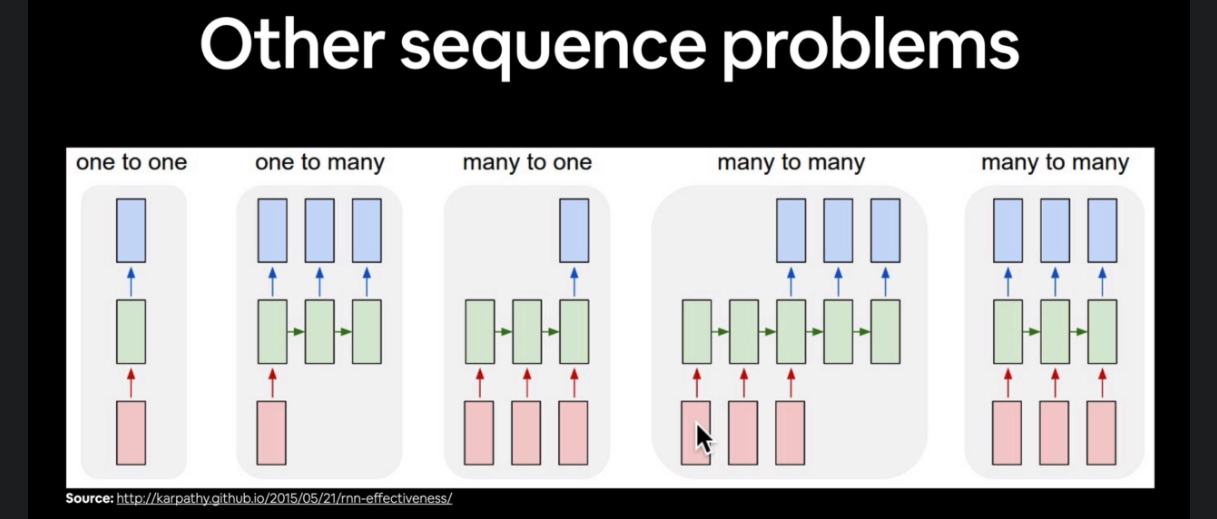

Examples of some sequence problems

1.  Many to one - Sentiment Analysis like analysing comments on youtube section,Time series forecasting (like predicting the prices of Bitcoin)
2.  One to many - Image Captioning [Passing on an image and the resuly maybe a whole captioned images]
3.  Many to many - Google translate

# Todo update list
1. Dataset preprocessing - Done
2. Tokenization and embedding - 
3. RNN/CNN/Transfer-learning model setups
4. External model from Tfhub
5. Evaluation of the models
6. Prediction on custom data



# Inputs and outputs to an NLP problem statement
The inputs to an NLP problem is that a sequence of words are passed for example lets take an example of fake news related tweets classification , in this problem the tweets wold get numerical encoded which forms the input in a NLP model, because a Machine learning algorithm prefers values between 0 and 1 so it gets encoded in those ranges by tokenization and Character embedding . The output for this problem would be in probabilities like how much chance is there that it is a fake or how much chance is there
that it is real.

In simpler words what the machine basically uses is the #BATCH SIZE and the #Embedding_size [these vary as per the problem statement that we are handling].Batch size is basically partitioning the data into batches because for deep learning we need a GPU, and a GPU likes to work on batches on data rather than passing the dataset in one whole go.The embedding size is the size of the tensor because the tweet would be represented as tensor.And the ouputs would be the shape of the output tensor which is equal to the nos of classes the data is getting classified into like 2, 3, 4 ,5. In this case it's getting classified as 2 types like fake or real[this also varies as per your problem statement].

# Steps in modelling in Tensorflow
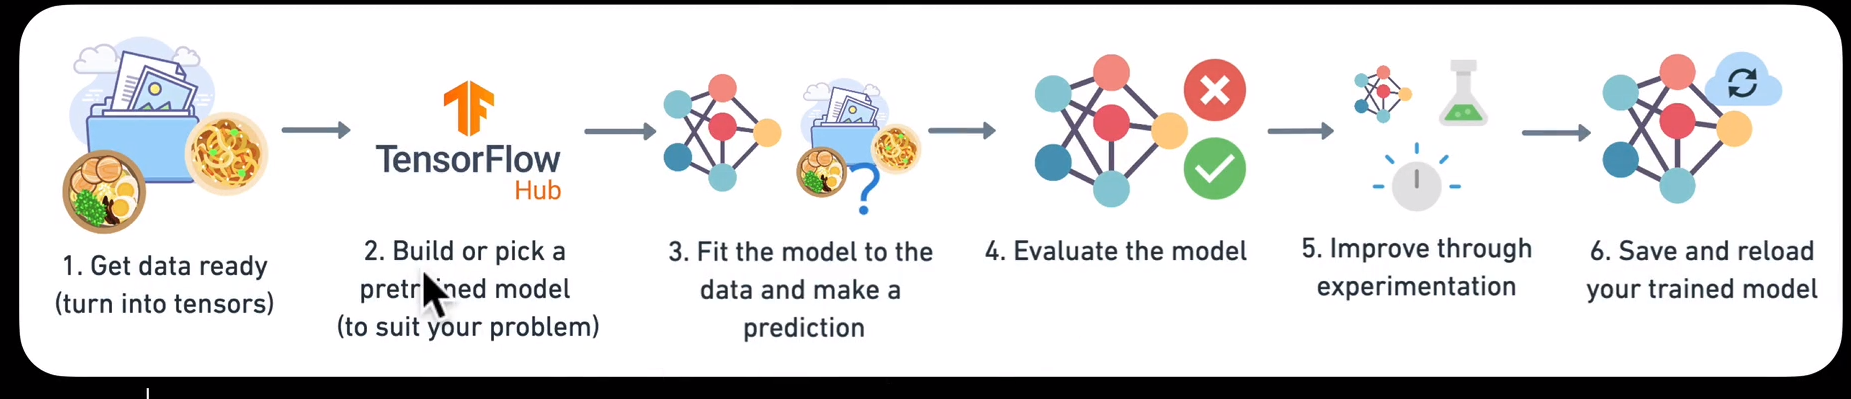

# Typical Architecture of Recurrent neural network

A recurrent neural network (RNN) is a class of artificial neural networks
where connections between nodes form a directed 
or undirected graph along a temporal sequence.

Basically it works on data with a temporal sequence that means a data which has a start 
and a end [Time series problem]

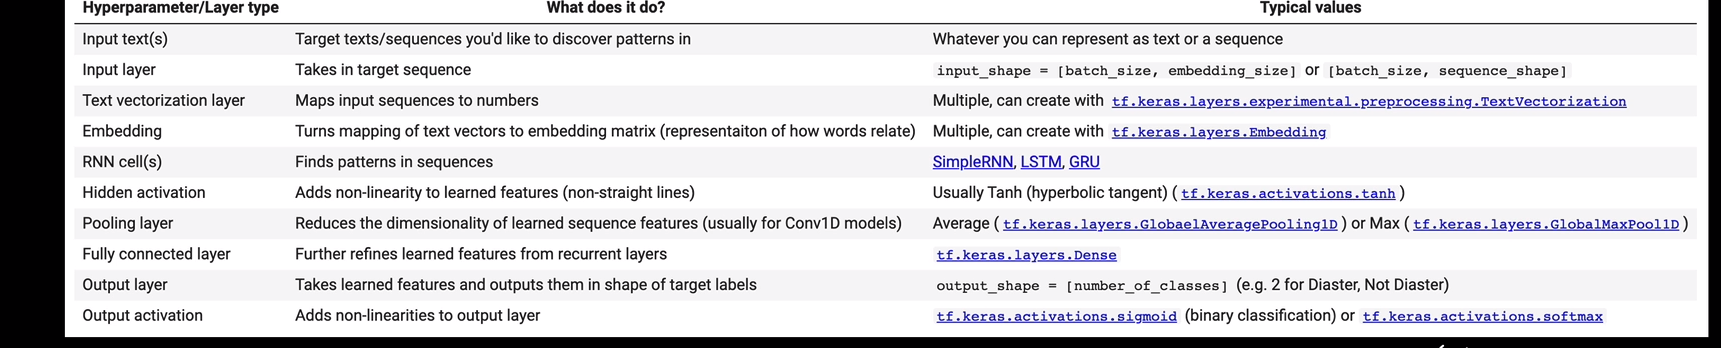



In [7]:
# My custom helper functions
# !wget https://raw.githubusercontent.com/Purbayan2014/Tensorflow-prac-scripts/master/Transfer-learning/Fine-Tuning/utils.py

In [8]:
# Libraries used
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers,Model
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from utils import loss_plotter,image_preprocessor,pretty_matrix,pred_image_plt_plot,create_tensorboard_callback,histor_cmp,unzip_data,walker_dt_dir,evaluate_bin_class_model
from sklearn.model_selection import train_test_split
import pandas as pd
import random

In [9]:
# getting the dataset [kaggle's introduction to NLP dataset] binary classification
!ls -la

/usr/bin/zsh: /mnt/drive1/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
total 19204
drwxr-xr-x 4 markins markins     4096 Aug  6 16:20 .
drwxr-xr-x 4 markins markins     4096 Aug  4 23:28 ..
drwxr-xr-x 2 markins markins     4096 Aug  5 09:28 .ipynb_checkpoints
-rw-rw-r-- 1 markins markins    80388 Aug  6 15:14 metadata.tsv
-rw-r--r-- 1 markins markins  3126875 Aug  6 16:20 NLP-reference-notes.ipynb
drwxr-xr-x 2 markins markins     4096 Aug  6 12:42 __pycache__
-rw-r--r-- 1 markins markins   420783 Aug  4 22:30 test.csv
-rw-r--r-- 1 markins markins   987712 Aug  4 22:31 train.csv
-rw-r--r-- 1 markins markins     6262 Aug  4 22:24 utils.py
-rw-rw-r-- 1 markins markins 15015861 Aug  6 15:14 vectors.tsv


In [10]:
# Visualizing the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [11]:
train_df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [12]:
test_df.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

In [13]:
# TEXT is the tweets and the targets are the labels
# 1 is for disaster and 0 is for safe

# shuffling the dataset
train_df_sf = train_df.sample(frac=1,random_state=42)
train_df_sf.head()

id      keyword               location  \
2644  3796  destruction                    NaN   
2227  3185       deluge                    NaN   
5448  7769       police                     UK   
132    191   aftershock                    NaN   
6845  9810       trauma  Montgomery County, MD   

                                                   text  target  
2644  So you have a new weapon that can cause un-ima...       1  
2227  The f$&amp;@ing things I do for #GISHWHES Just...       0  
5448  DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...       1  
132   Aftershock back to school kick off was great. ...       0  
6845  in response to trauma Children of Addicts deve...       0

In [14]:
train_df.target.value_counts() # nos of examples in each classes

0    4342
1    3271
Name: target, dtype: int64

In [15]:
print('Nos of samples in the dataset :',len(train_df)+len(test_df))

Nos of samples in the dataset : 10876


In [16]:
# Visualizing on random samples
rand_index = random.randint(0, len(train_df)-5)
for row in train_df_sf[['text','target']][rand_index:rand_index+5].itertuples(): # grabbing 5 samples
    _, text,target = row
    print(f"Target : {target}", "(real disater)" if target > 0 else "(not a real disaster)")
    print(f"Text :\n{text}\n")
    print("---\n")

Target : 0 (not a real disaster)
Text :
I regress and I slip and I fall off that cliff

---

Target : 0 (not a real disaster)
Text :
1970 Mercury Cyclone GT Hood Moulding Very NICE CORE Cobra Jet 429CJ GT http://t.co/jOBVBvKFnZ http://t.co/C8zPmZhTDE

---

Target : 1 (real disater)
Text :
The cryptic words that guided pilots on the Hiroshima bombing mission http://t.co/39IAbcC5pK

---

Target : 1 (real disater)
Text :
Salvation Army hosts rally to reconnect fathers with children: The Salvation Army is hosting a back to school rallyÛ_ http://t.co/rDjpor3AZg

---

Target : 0 (not a real disaster)
Text :
#DnB #NewRelease EDGE Jimmy - Summer Rainstorm (Lapaka Sounds) http://t.co/4L8h2FKlNO via http://t.co/ZITQKDFXJY

---



In [17]:
# Splitting the data into train and validation data
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_sf['text'].to_numpy(),
                                                                           train_df_sf['target'].to_numpy(),
                                                                           test_size=0.1,
                                                                           random_state=42)

In [18]:
len(train_sentences),len(val_sentences),len(val_labels),len(train_labels)

(6851, 762, 762, 6851)

In [19]:
train_sentences[:10], train_labels[:10] # first 10 samples

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

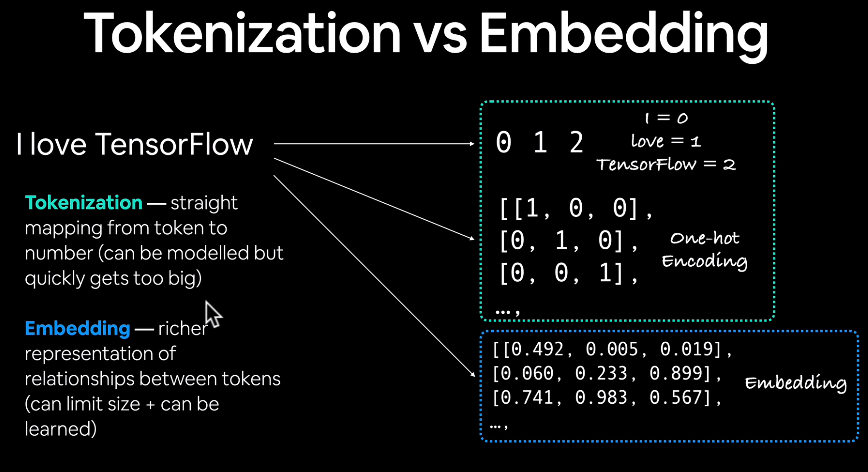

# Text Vectorization(tokenization)

In [20]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [21]:
# # tf.keras.layers.TextVectorization(
# #     max_tokens=None,
# #     standardize='lower_and_strip_punctuation',
# #     split='whitespace',
# #     ngrams=None,
# #     output_mode='int',
# #     output_sequence_length=None,
# #     pad_to_max_tokens=False,
# #     vocabulary=None,
# #     idf_weights=None,
# #     sparse=False,
# #     ragged=False,
# #     **kwargs
# # )

# The processing of each example contains the following steps:

# Standardize each example (usually lowercasing + punctuation stripping)
# Split each example into substrings (usually words)
# Recombine substrings into tokens (usually ngrams)
# Index tokens (associate a unique int value with each token)
# # Transform each example using this index, either into a vector of ints or a dense float vector.

In [22]:
max_vocab_length = 10000 # max nos of words to have in our vocabulary
max_length = 15 # max length of our sequences will be ? (how many words from a tweet
# our model will see)

text_vectorizer =  TextVectorization(max_tokens=max_vocab_length, # how many group of words in the train sent
                                     # automatically figures out how many classes of words are there
                                     # and adds <OVV> which stands for out of vocabulary token
                                     # if max token in set 500 then it will pick out the most common 
                                     # 500 words that are found in the train dataset and rare words 
                                     # would get replaced by <OVV>
                                     standardize="lower_and_strip_punctuation", # convert to lowercase and remov ethe unusall data 
                                     split = "whitespace",
                                     ngrams=None, # create group of n words
                                     output_mode = "int", # how to map tokens to numbers
                                     output_sequence_length = max_length,# how long do we want our sequence of words to be
                                     pad_to_max_tokens = True # enabling padding for redundant chars in shorter words
                                    )

2022-08-06 16:26:35.871032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-06 16:26:43.316713: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2919 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1


In [23]:
len(train_sentences[0].split())

7

In [24]:
# finding the average nos of tokens in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [25]:
# mapping the text vectorizer towards the train data
# fitting the text vectorizer to the train data
text_vectorizer.adapt(train_sentences)

In [26]:
# creating a sampling sentence and tokenize it
sample_sentence  = 'Wow I woke up on the wrong side of the bed , today i guess - Purbayan 2022'
sample_sentence_2 =  "NLP is not fun !!! "
text_vectorizer([sample_sentence]), text_vectorizer([sample_sentence_2])

(<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
 array([[ 970,    8, 1450,   27,   11,    2,  797,  668,    6,    2, 1040,
          124,    8, 1205,    1]])>,
 <tf.Tensor: shape=(1, 15), dtype=int64, numpy=
 array([[  1,   9,  34, 604,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0]])>)

In [27]:
"""
970 - wow
1450 - I
woke - up
.... and so on

In the second mapping we can see a lot of 0 because the redundant characters got converted 
mapped into 0
"""
# choosing a random sentence and tokenize it
rand_sentence = random.choice(train_sentences)
print(f"Original sentence:\n {rand_sentence}\
        \n\nVectorized version:")
text_vectorizer([rand_sentence])

Original sentence:
 Investigators shift focus to cause of fatal Waimate fire http://t.co/c9dVDsSoFn        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 420,  988, 2109,    5,  257,    6,  163, 2615,   42,    1,    0,
           0,    0,    0,    0]])>

In [28]:
# gettting the unique words in the training data
words_in_vocab = text_vectorizer.get_vocabulary() # getting all the unique words in the sentences
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # getting the least common words
print(f"5 Most common words in the vocab test : {top_5_words}")
print(f"5 Least common words in the vocab test : {bottom_5_words}")
print(f"Number of words in the vocab are {len(words_in_vocab)}")

# UNK stands for unknow that is basically the words that are out of the top 10000 words in the 
# dataset and is basically the OOV tokens

5 Most common words in the vocab test : ['', '[UNK]', 'the', 'a', 'in']
5 Least common words in the vocab test : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']
Number of words in the vocab are 10000


In [29]:
### Creating an embedding layer 
"""
The common parameters that are used in the embedding layer :

1. input_dim = the size of the vocabulary
2. output_dim = the size of the output embedding vector example {
for a value of 100 would mean each token would get represented by a vector
of 100 long
3. input_length = length of the sequences being passed to the embedding layer

}

"""

'\nThe common parameters that are used in the embedding layer :\n\n1. input_dim = the size of the vocabulary\n2. output_dim = the size of the output embedding vector example {\nfor a value of 100 would mean each token would get represented by a vector\nof 100 long\n3. input_length = length of the sequences being passed to the embedding layer\n\n}\n\n'

In [30]:
"""
I used the output_dim 128 because the models that i will create will 
compute on GPU , it is said that a model performs well if its a 
multiple of 8 that is 8,64,128.. etc

"""

embedding = layers.Embedding(input_dim=max_vocab_length, # input shape
                            output_dim = 128, # output_shape,
                            embeddings_initializer='uniform', # no need to understand this now ignore it
                            input_length=max_length,# how long the input
                            )
                        
    
# choosing a random sentence and tokenize it
rand_sentence = random.choice(train_sentences)
print(f"Original sentence:\n {rand_sentence}\
        \n\nEmbedded version:")

# embedding the random_sent into a dense vector of thick layer
sample_embed = embedding(text_vectorizer([rand_sentence]))
sample_embed 

Original sentence:
 Obsolete devastation from Broad with the Ball. And Root doing it with Bat in hand. Great Day #ashes2015 #ENGvAUS http://t.co/a7TJAWWtJ7        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04525036,  0.00653789,  0.02324482, ..., -0.03737324,
          0.03183073, -0.00865299],
        [ 0.02565512, -0.01009873,  0.02683664, ...,  0.00563969,
          0.00477206, -0.01028761],
        [ 0.03536086,  0.03597783, -0.00782084, ..., -0.02622353,
         -0.01023499, -0.02248998],
        ...,
        [-0.02653016, -0.03545084, -0.03446879, ..., -0.01177289,
          0.04868598, -0.01079142],
        [ 0.00744915,  0.01285804, -0.03512903, ..., -0.04377506,
         -0.0215499 , -0.02675915],
        [-0.04753733,  0.00951422, -0.03038533, ...,  0.01273284,
         -0.01156578,  0.01691277]]], dtype=float32)>

In [31]:
# The shape 1 , 15 , 128 is very important to understand
# 1 denotes that only a single token of sequence has been passed
# 15 denotes the nos of token generated from the sequence
# 128 denotes that all the tokens are in the format of 128 vector 

In [32]:
# checking out a single embedding
sample_embed[0][0] , sample_embed[0][0].shape, rand_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-4.52503562e-02,  6.53789192e-03,  2.32448243e-02,  3.69841196e-02,
         2.59243958e-02,  4.21580933e-02, -1.50047243e-04, -1.09420307e-02,
         2.54410394e-02, -3.26070338e-02, -1.43341199e-02,  1.76358931e-02,
        -4.59939241e-02, -3.94050963e-02, -4.16264534e-02,  1.44513883e-02,
        -4.08258326e-02,  4.02053036e-02,  2.97608860e-02, -4.87804078e-02,
         6.96276501e-03, -3.91008146e-02, -7.65575096e-03, -2.34249122e-02,
        -3.68432291e-02, -1.53548494e-02,  3.81635763e-02,  1.38356946e-02,
        -6.91805035e-03,  3.31920385e-03,  4.06367667e-02,  2.05959715e-02,
         1.90366060e-04,  1.81194395e-03, -1.19575746e-02, -3.58415954e-02,
         3.92582268e-03,  3.87192629e-02, -2.93478258e-02, -3.51923592e-02,
         3.04981507e-02, -1.87707674e-02,  9.40449536e-05,  4.51866053e-02,
         2.40298845e-02,  3.35371606e-02,  2.08618529e-02, -1.62510946e-03,
         2.59165205e-02,  1.30777992e-0

In [33]:
# In the above we can see the numerical 
# representation of the the sentence with the original sentence printed 
# below

In [34]:
# Modelling Experiments [TODO]

"""
0                  Naive Bayes with TF-IDF encoder(baseline model)
1                  Feed-forward neural network (dense model)
2                  LSTM(RNN) {Long Short Term Memory}
3                  GRU(RNN)  {Gated Reccurent Unit}
4                  Bidirectional-LSTM(RNN)
5                  1D Convulational Neural Network
6                  Tensorflow Hub Pretrained Feature Extractor
7                  Tensorflow Hub Pretrained Feature Extractor (10% of the data)

"""

'\n0                  Naive Bayes with TF-IDF encoder(baseline model)\n1                  Feed-forward neural network (dense model)\n2                  LSTM(RNN) {Long Short Term Memory}\n3                  GRU(RNN)  {Gated Reccurent Unit}\n4                  Bidirectional-LSTM(RNN)\n5                  1D Convulational Neural Network\n6                  Tensorflow Hub Pretrained Feature Extractor\n7                  Tensorflow Hub Pretrained Feature Extractor (10% of the data)\n\n'

In [35]:
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [36]:
# Model 0 Baseline Model 
# Naive Bayes with TF-IDF encoder 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# creating a tokenization and modelling pipeline
model_0 =  Pipeline([
    ("tfidf", TfidfVectorizer()), # convert the words into nos using tfidf
    ("clf", MultinomialNB()) # model the text clf stands for classifier
])

# fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [37]:
# Evaluate the baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Accuracy of the baseline model : {baseline_score*100:.2f}%")

Accuracy of the baseline model : 79.27%


In [38]:
# make the predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

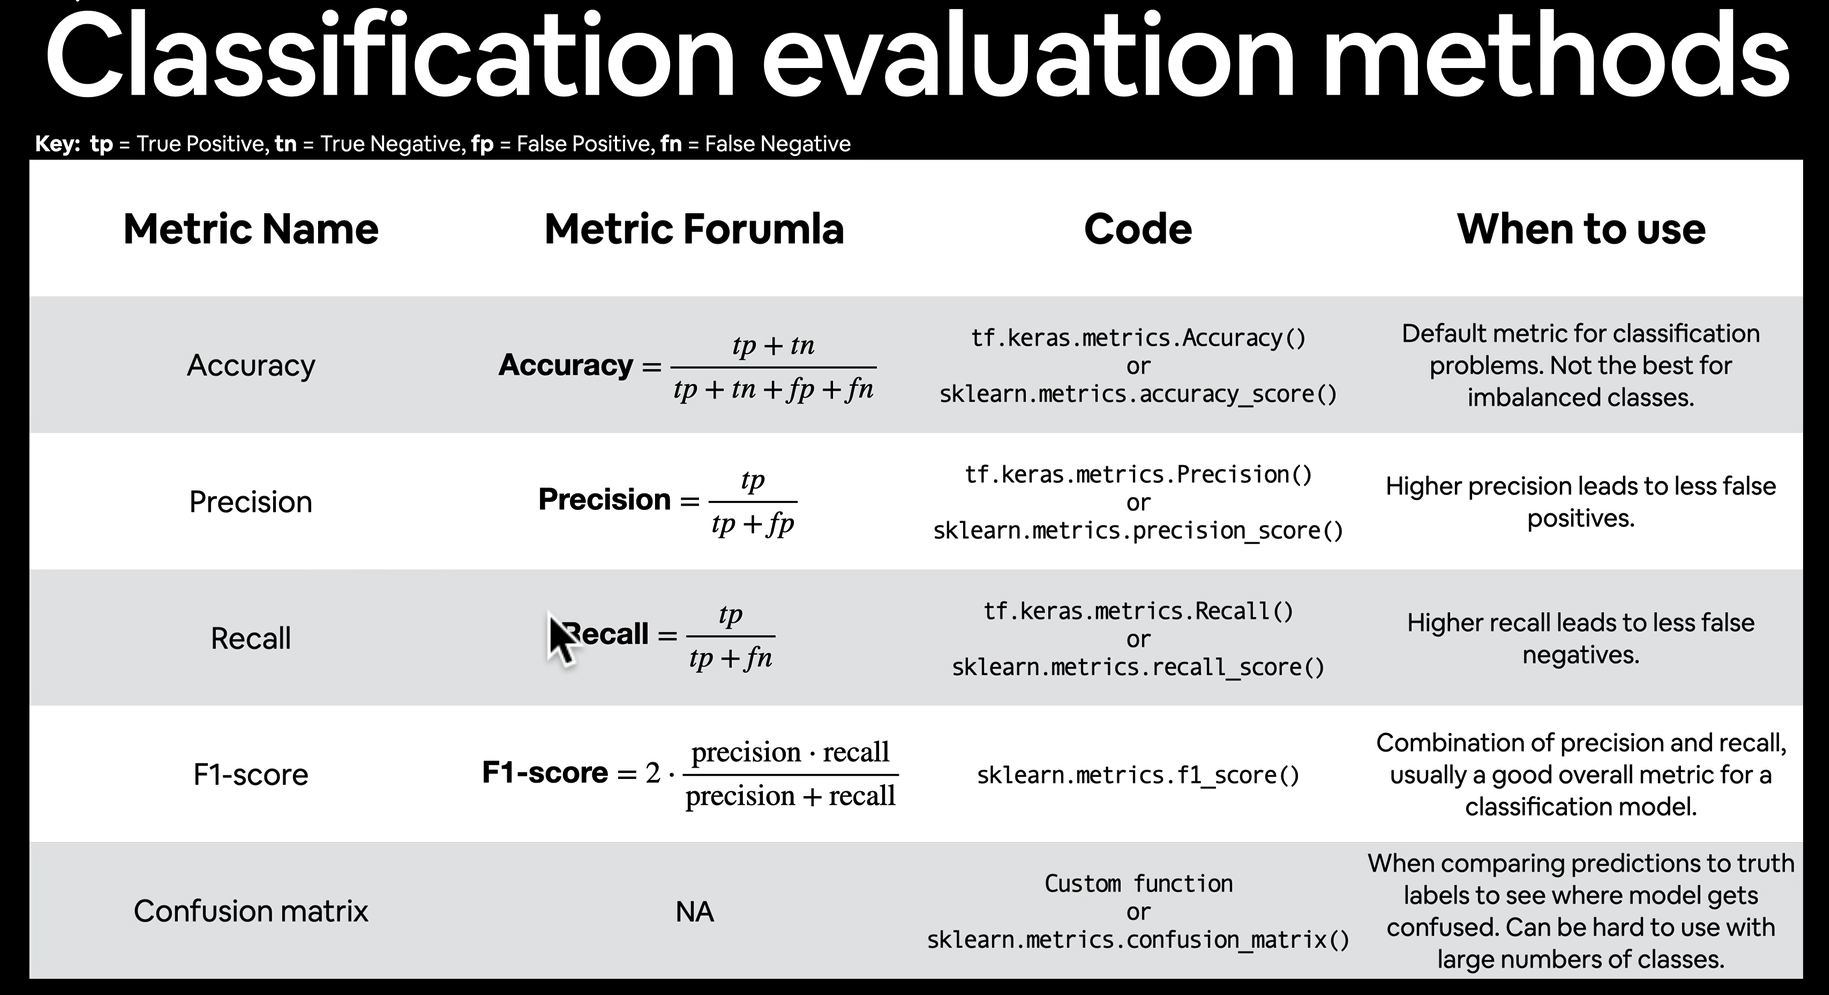

In [39]:
## Creating a evaluation func
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    Calculate the evaluation metrics for a bin clf model
    """
    model_acc = accuracy_score(y_true,y_pred)*100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
    model_results = {"accuracy" : model_acc,
                    "precision" : model_precision,
                    "recall" : model_recall,
                    "f1"   : model_f1}
    return model_results

In [40]:
# get the metrics

baseline_results = calculate_results(y_true=val_labels,
                                    y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [41]:
# Model 1 Feed Forward Neural Network

# create a tensorboard callback
# create a directory to save the model logs
SAVE_DIR = "MODEL_LOGS"


# Buidling the model with functional API
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# Using the GlobalAvgPooling1D helps in ordering the dimensions 
# in the inputs that have been passed from layer to layer. 
# So at the end, you will have the shape (batch_size , 1 , features) 
# its more like using the Flatten layer except more efficient than 
# a Flatten layer. 
x = layers.GlobalAveragePooling1D()(x)
# x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = Model(inputs, outputs, name="model_1_dense")

In [42]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [43]:
# compile the model
model_1.compile(loss=BinaryCrossentropy(),
               optimizer=Adam(),
               metrics=["accuracy"])

# fit the model
model_1_history = model_1.fit(x=train_sentences,
                             y=train_labels,
                             epochs=5,
                             validation_data=(val_sentences, val_labels),
                             callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                  exp_name="model_1_dense")])


Gathering the log data and saving in : MODEL_LOGS/model_1_dense/20220806-162646
Epoch 1/5
215/215 [==============================] - 6s 4ms/step - loss: 0.6134 - accuracy: 0.6898 - val_loss: 0.5373 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4415 - accuracy: 0.8199 - val_loss: 0.4722 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3468 - accuracy: 0.8637 - val_loss: 0.4566 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2836 - accuracy: 0.8908 - val_loss: 0.4629 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2374 - accuracy: 0.9126 - val_loss: 0.4768 - val_accuracy: 0.7887


In [44]:
# check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.7887


[0.47678378224372864, 0.7887139320373535]

In [45]:
# make some predictions and evaluate them
model_1_prd = model_1.predict(val_sentences)
model_1_prd[:10],model_1_prd[0],model_1_prd.shape

24/24 [==============================] - 0s 1ms/step


(array([[0.3292437 ],
        [0.7660703 ],
        [0.9977883 ],
        [0.09943543],
        [0.10308538],
        [0.9320096 ],
        [0.9107277 ],
        [0.99385226],
        [0.96297556],
        [0.25845435]], dtype=float32),
 array([0.3292437], dtype=float32),
 (762, 1))

In [46]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [47]:
# convert the model pred to the label format
# remove the single 1 dimension and round off the predictions
model_1_pred = tf.squeeze(tf.round(model_1_prd))
model_1_pred[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [48]:
# Calculate the reuslts
model_1_res = calculate_results(val_labels,model_1_pred)
model_1_res

{'accuracy': 78.87139107611549,
 'precision': 0.7948464726843409,
 'recall': 0.7887139107611548,
 'f1': 0.7853694687698636}

In [49]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [50]:
import numpy as np
np.array(list(model_1_res.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [51]:
# We get four metrics that are higher than the deep learning  model

In [52]:
# Visualizing the model's learned word embeddings with Tensorflow's projector tool

# get the vocab from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [53]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [54]:
# get the weights matrix of the embedding layer
# (these are the numerical representations of each token in our training
# data for 5 epochs)

embedded_wts = model_1.get_layer("embedding").get_weights()[0]
embedded_wts.shape,embedded_wts

((10000, 128),
 array([[-0.01894735,  0.01616258, -0.0169957 , ...,  0.06106708,
          0.00699061, -0.0549066 ],
        [-0.04945629,  0.00133436,  0.03110977, ..., -0.02943591,
          0.02431133, -0.01575641],
        [ 0.00914103,  0.00393746,  0.04436723, ..., -0.01750856,
         -0.02837796,  0.01378092],
        ...,
        [ 0.00148287, -0.03716122, -0.04174202, ...,  0.0404513 ,
         -0.00625456, -0.00782596],
        [-0.03274293, -0.01843173,  0.03474772, ...,  0.04888256,
         -0.01597342, -0.0760651 ],
        [-0.04785468, -0.05269562,  0.0985206 , ...,  0.03549253,
         -0.01075946, -0.05574033]], dtype=float32))

In [55]:
# gets the all the wts in the embedded layer in the above cell

In [56]:
# Lets visualize the embedded weghts matrix
# https://www.tensorflow.org/text/guide/word_embeddings

# Create embedding files {we got this from the documentation}
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8') # vectors 
out_m = io.open('metadata.tsv', 'w', encoding='utf-8') # metadata that is the words

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embedded_wts[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [57]:
# check the files
!ls

/usr/bin/zsh: /mnt/drive1/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
metadata.tsv  NLP-reference-notes.ipynb  test.csv   utils.py
MODEL_LOGS    __pycache__		 train.csv  vectors.tsv


In [58]:
# word2vec
# https://www.tensorflow.org/tutorials/text/word2vec
# https://towardsdatascience.com/word2vec-explained-49c52b4ccb71

# download the files if using a colab to the projector
# try:
#     from google.colab import files
#     files.download('vectors.tsv')
#     files.download('metadata.tsv')
# except Exception:
#     pass

# Load in the tsv files in https://projector.tensorflow.org/
# to visualize the weights

# https://jalammar.github.io/illustrated-word2vec/

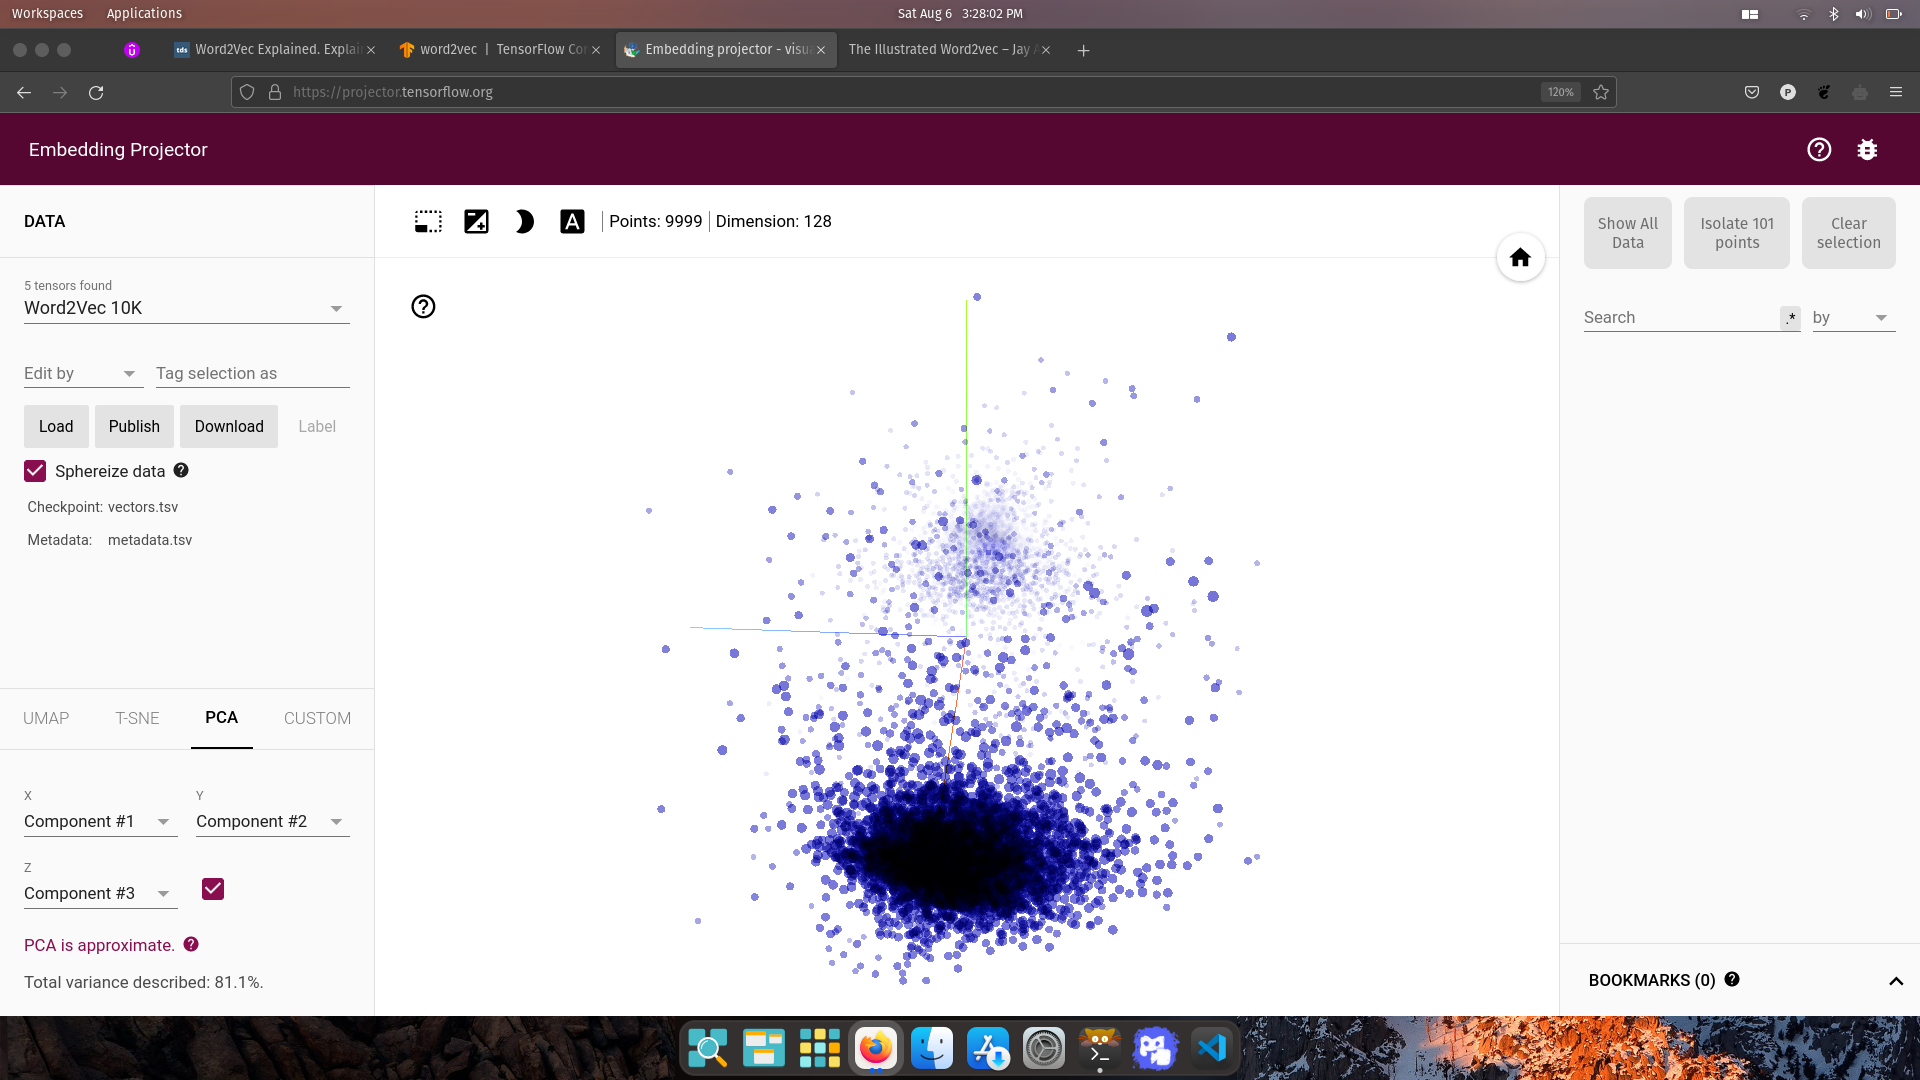

# High level RNN's models


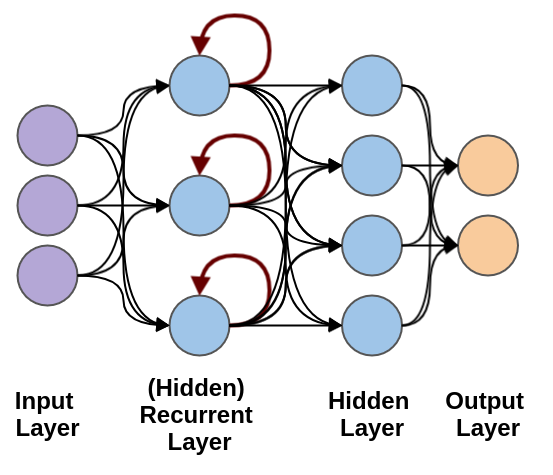

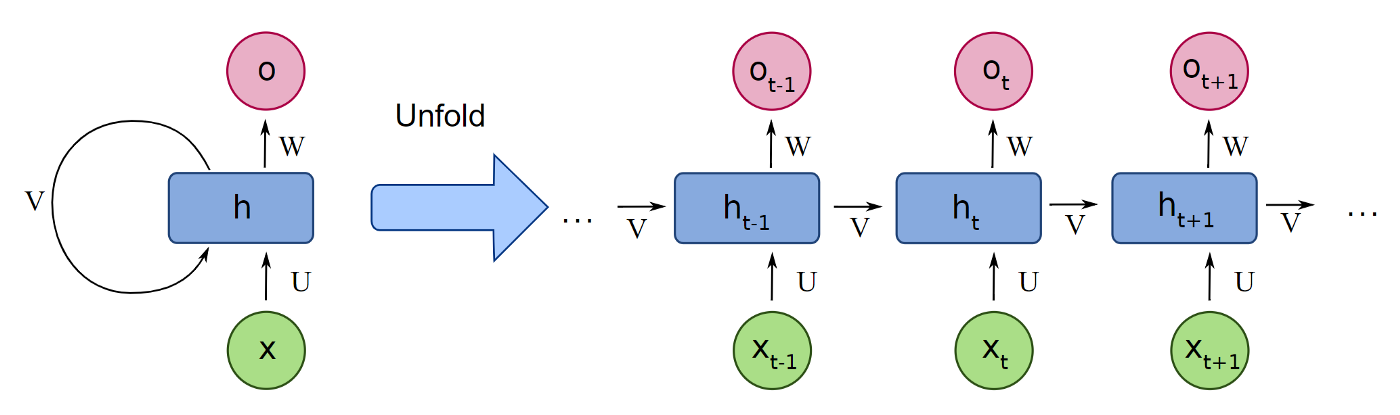

In [59]:
# let the T be the current time seq so its taking input 
# from the seq of t-1

# https://www.youtube.com/watch?v=QvkQ1B3FBqA&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

In [60]:
# LSTM

# https://colah.github.io/posts/2015-08-Understanding-LSTMs/
# http://karpathy.github.io/2015/05/21/rnn-effectiveness/

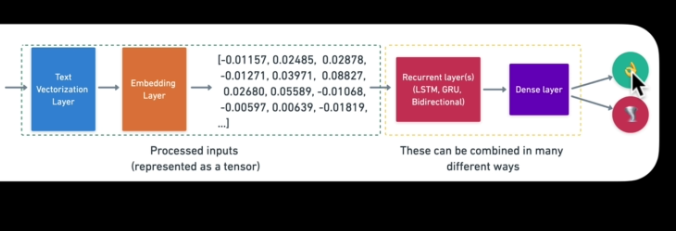

In [61]:
# Model 2 LSTM [RNN]
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape) # output of the embedding layer shape
x = layers.LSTM(64, return_sequences=True)(x) # 64 is the hidden units
print(x.shape) # shape of the lstm layer , we used return seq = true that's why the seq of the previous layer got repeated 
x = layers.LSTM(64)(x)
print(x.shape) 
x = layers.Dense(64, activation='relu')(x)
print(x.shape)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = Model(inputs, outputs,name='model_2_LSTM')

(None, 15, 128)
(None, 15, 64)
(None, 64)
(None, 64)


In [62]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [63]:
# compile the model
model_2.compile(loss=BinaryCrossentropy(),
               optimizer=Adam(),
               metrics=["accuracy"])

In [64]:
# fit the model
model_2_history = model_2.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences, val_labels),
                             callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   "model_2_LSTM")])

Gathering the log data and saving in : MODEL_LOGS/model_2_LSTM/20220806-162657
Epoch 1/5


2022-08-06 16:27:08.562201: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


215/215 [==============================] - 15s 8ms/step - loss: 0.2214 - accuracy: 0.9228 - val_loss: 0.5454 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1627 - accuracy: 0.9397 - val_loss: 0.5552 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1305 - accuracy: 0.9507 - val_loss: 0.6366 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1084 - accuracy: 0.9585 - val_loss: 0.7057 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0826 - accuracy: 0.9679 - val_loss: 1.0816 - val_accuracy: 0.7769


In [65]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 2ms/step


array([[8.0854846e-03],
       [7.7005941e-01],
       [9.9998808e-01],
       [4.3794371e-02],
       [7.9998317e-05],
       [9.9981385e-01],
       [9.3859833e-01],
       [9.9999368e-01],
       [9.9998474e-01],
       [6.5450597e-01]], dtype=float32)

In [66]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [67]:
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [68]:
# calculate the model 2 results

model_2_results = calculate_results(y_true=val_labels,
                                   y_pred=model_2_preds)
model_2_results

{'accuracy': 77.69028871391076,
 'precision': 0.7784265812728361,
 'recall': 0.7769028871391076,
 'f1': 0.7750036673315875}

In [69]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [70]:
# It still seems that the baseline model is performing better than
# the LSTM model

In [73]:
!ls -la

/usr/bin/zsh: /mnt/drive1/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
total 19568
drwxr-xr-x 5 markins markins     4096 Aug  6 16:27 .
drwxr-xr-x 4 markins markins     4096 Aug  4 23:28 ..
drwxr-xr-x 2 markins markins     4096 Aug  5 09:28 .ipynb_checkpoints
-rw-rw-r-- 1 markins markins    80388 Aug  6 16:26 metadata.tsv
drwxr-xr-x 4 markins markins     4096 Aug  6 16:26 MODEL_LOGS
-rw-r--r-- 1 markins markins  3125588 Aug  6 16:27 NLP-reference-notes.ipynb
drwxr-xr-x 2 markins markins     4096 Aug  6 12:42 __pycache__
-rw-r--r-- 1 markins markins   420783 Aug  4 22:30 test.csv
-rw-r--r-- 1 markins markins   987712 Aug  4 22:31 train.csv
-rw-r--r-- 1 markins markins     6262 Aug  4 22:24 utils.py
-rw-rw-r-- 1 markins markins 15384272 Aug  6 16:26 vectors.tsv
